In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
%matplotlib inline

## Explore face expression data

data acquired from this github directory: https://github.com/muxspace/facial_expressions

In [230]:
# Get path to data directory
import os
workingdir = os.path.abspath(os.getcwd())
datadir = workingdir + '\data'
expressiondir = datadir + "\\facial_expressions"
datafile = expressiondir + '/data/legend.csv'          # First table with labels
datafile2 = expressiondir + '/data/500_picts_satz.csv' # 2nd table with labels - will be used as test data
imagedir = expressiondir + '\\images'  # Directory of actual images

In [231]:
face1 = pd.read_csv(datafile, index_col = False)
face2 = pd.read_csv(datafile2, names = face1.columns, index_col = False)
faces = pd.concat([face1,face2])

In [232]:
faces = faces[1:] # First image corrupted, drop it
faces = faces.reset_index(drop = True)

Since we don't have enough data for all types of emotions, let us go with valence for now  
positive emotion = happiness  
neutral emotion = neutral  
negative emotion = sadness, disgust, fear, sad, anger  
drop surprise and contempt from data for now.

In [ ]:
face1.loc[face1.emotion == 'HAPPINESS','emotion'] = 'positive'
face1.loc[face1.emotion == 'happiness','emotion'] = 'positive'

In [234]:
face1.loc[face1.emotion == 'sadness','emotion'] = 'negative'
face1.loc[face1.emotion == 'sad','emotion'] = 'negative'
face1.loc[face1.emotion == 'SADNESS','emotion'] = 'negative'
face1.loc[face1.emotion == 'DISGUST','emotion'] = 'negative'
face1.loc[face1.emotion == 'disgust','emotion'] = 'negative'
face1.loc[face1.emotion == 'FEAR','emotion'] = 'negative'
face1.loc[face1.emotion == 'fear','emotion'] = 'negative'
face1.loc[face1.emotion == 'ANGER','emotion'] = 'negative'
face1.loc[face1.emotion == 'anger','emotion'] = 'negative'

In [235]:
face1.loc[face1.emotion == 'NEUTRAL','emotion'] = 'neutral'

In [236]:
face1

,user.id,image,emotion
0,628,facial-expressions_2868585k.jpg,surprise
1,628,facial-expressions_2868584k.jpg,negative
2,628,facial-expressions_2868582k.jpg,negative
3,dwdii,Aaron_Eckhart_0001.jpg,neutral
4,302,Aaron_Guiel_0001.jpg,positive
...,...,...,...
13853,a,laugh6.jpg,positive
13854,a,happy1.jpg,positive
13855,a,happy2.jpg,positive
13856,a,happy3.jpg,positive


In [237]:
face1 = face1.drop(np.where(face1.emotion == 'contempt')[0], axis = 0).reset_index(drop = True)
face1 = face1.drop(np.where(face1.emotion == 'surprise')[0], axis = 0).reset_index(drop=True)
face1 = face1.drop(np.where(face1.emotion == 'SURPRISE')[0], axis = 0).reset_index(drop=True)

In [240]:
emotions = face1.emotion.value_counts()

In [241]:
emotions

neutral     6868
positive    5705
negative     907
Name: emotion, dtype: int64

In [127]:
facevalue = {value : test for test, value in enumerate(face1.emotion.value_counts().sort_values().to_dict())}
facevalue
# for the inverse, do list(facevalue.keys())[value]

{'negative': 0, 'positive': 1, 'neutral': 2}

In [ ]:
emotionvalue = faces.emotion.apply(lambda x: facevalue[x])
emotionvalue

In [244]:
face1.emotion = face1.emotion.apply(lambda x: facevalue[x])
face1.to_csv(expressiondir + '/data/legend.csv', index = False)

In [15]:
face2.emotion = face2.emotion.apply(lambda x: facevalue[x])
face2.to_csv(expressiondir + '/data/legend2.csv', index = False)

Earlier code playing with images

In [173]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
def gray2rgb(gray):
    return np.stack([gray, gray, gray], axis = 2)

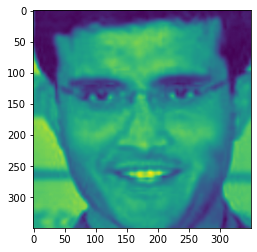

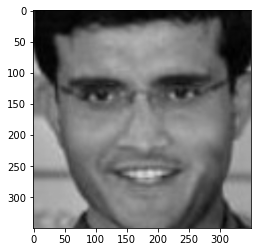

In [230]:
idx = 1
image1 = imagedir + '/' + face2.image.iloc[idx]
img=mpimg.imread(image1)
plt.imshow(img); plt.show()
# if img.ndim>2:
#     img = rgb2gray(img)
if img.ndim == 2:
    img = gray2rgb(img)
plt.imshow(img)

In [224]:
img

array([[[ 49,  49,  49],
        [ 48,  48,  48],
        [ 35,  35,  35],
        ...,
        [ 15,  15,  15],
        [ 16,  16,  16],
        [ 16,  16,  16]],

       [[ 48,  48,  48],
        [ 48,  48,  48],
        [ 35,  35,  35],
        ...,
        [ 15,  15,  15],
        [ 16,  16,  16],
        [ 16,  16,  16]],

       [[ 48,  48,  48],
        [ 47,  47,  47],
        [ 35,  35,  35],
        ...,
        [ 16,  16,  16],
        [ 16,  16,  16],
        [ 16,  16,  16]],

       ...,

       [[139, 139, 139],
        [138, 138, 138],
        [138, 138, 138],
        ...,
        [ 82,  82,  82],
        [ 87,  87,  87],
        [ 87,  87,  87]],

       [[139, 139, 139],
        [139, 139, 139],
        [138, 138, 138],
        ...,
        [ 71,  71,  71],
        [ 76,  76,  76],
        [ 77,  77,  77]],

       [[139, 139, 139],
        [139, 139, 139],
        [139, 139, 139],
        ...,
        [ 72,  72,  72],
        [ 77,  77,  77],
        [ 78,  78,  78]]

In [175]:
test_image = []
for i in tqdm(range(X_file.shape[0])):
    image = imagedir + '/' + X_file[i]
    img=mpimg.imread(image)
#     if img.ndim>2:
#         img = rgb2gray(img)
    if img.ndim == 2:
        img = gray2rgb(img)
    test_image.append(img)

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 848.25it/s]


In [176]:
test_image = np.stack(test_image, axis = 0)

In [177]:
test_image.shape

(500, 350, 350, 3)